# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
display(flight.head())

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64


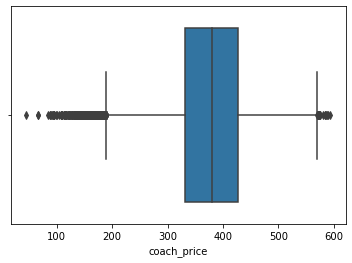

<Figure size 432x288 with 0 Axes>

In [2]:
## Task 1
print(flight['coach_price'].describe())
sns.boxplot(x=flight['coach_price'])
plt.show()
plt.clf()

*Coach ticket prices vary from 44USD to 593USD, but half of the tickets cost between 331USD and 426USD. The average price is about 377USD. Therefore, 500USD does not seem like a good price for a coach ticket.*

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64


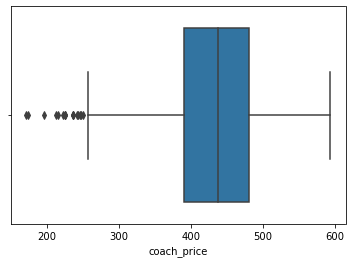

<Figure size 432x288 with 0 Axes>

In [3]:
## Task 2
data = flight[flight['hours']==8]
print(data['coach_price'].describe())
sns.boxplot(x=data['coach_price'])
plt.show()
plt.clf()

*Coach ticket prices for flights that are 8 hours long vary from 170USD to 593USD, but half of the tickets cost between 390USD and 480USD. The average price is about 431USD. Therefore, 500USD ticket seem more reasonable than before, but it is still quite a lot (it is more than the price of the 75% of all tickets for flights that are 8 hours long).*

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64


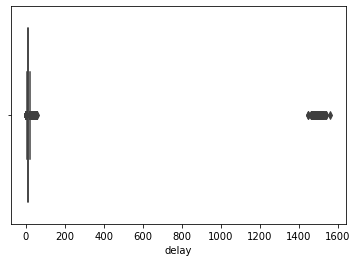

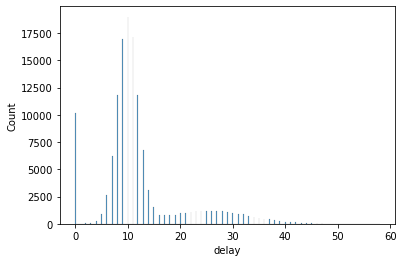

<Figure size 432x288 with 0 Axes>

In [4]:
## Task 3
print(flight['delay'].describe())

sns.boxplot(x=flight['delay'])
plt.show()
plt.clf()

sns.histplot(flight[flight['delay']<200]['delay'])
plt.show()
plt.clf()

*A lot of flights did not have any delay. If there was a delay, it was highly likely that is lasted about 10h. 75% of the delays were shorter than 13h. There were some outliers. The longest delay lasted 1560h.*

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

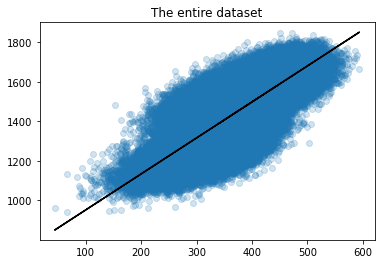

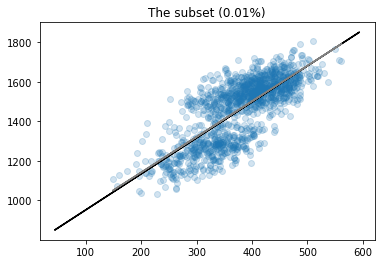

<Figure size 432x288 with 0 Axes>

In [5]:
## Task 4
x = flight['coach_price']
y = flight['firstclass_price']
m, b = np.polyfit(x, y, 1)
plt.scatter(x,y, alpha=0.2)
plt.plot(x, m*x+b, color='k')
plt.title('The entire dataset')
plt.show()
plt.clf()

flight_sub = flight.sample(n = int(flight.shape[0]*0.01))
x_sub = flight_sub['coach_price']
y_sub = flight_sub['firstclass_price']
plt.scatter(x_sub,y_sub, alpha=0.2)
plt.plot(x, m*x+b, color='k')
m, b = np.polyfit(x_sub, y_sub, 1)
plt.plot(x_sub, m*x_sub+b, color='gray')
plt.title('The subset (0.01%)')
plt.show()
plt.clf()

*There is strong relationship between these two prices. It is highly likely that a flight with higher coach prices has higher first-class prices as well.* 

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

In [6]:
## Task 5
category = ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']
data = flight[category+['coach_price']]
display(data.head())

,inflight_meal,inflight_entertainment,inflight_wifi,coach_price
0,No,Yes,Yes,338.820
1,No,Yes,Yes,472.655
2,No,Yes,No,351.960
3,No,Yes,Yes,387.835
4,Yes,Yes,Yes,374.735


In [7]:
flight.groupby(by=category).coach_price.count().sort_values(ascending=False)/len(flight)*100

inflight_meal  inflight_entertainment  inflight_wifi
No             Yes                     Yes              50.409154
Yes            Yes                     Yes              21.706734
No             No                      Yes              12.555093
               Yes                     No                5.604099
Yes            No                      Yes               5.301279
               Yes                     No                2.437201
No             No                      No                1.406226
Yes            No                      No                0.580213
Name: coach_price, dtype: float64

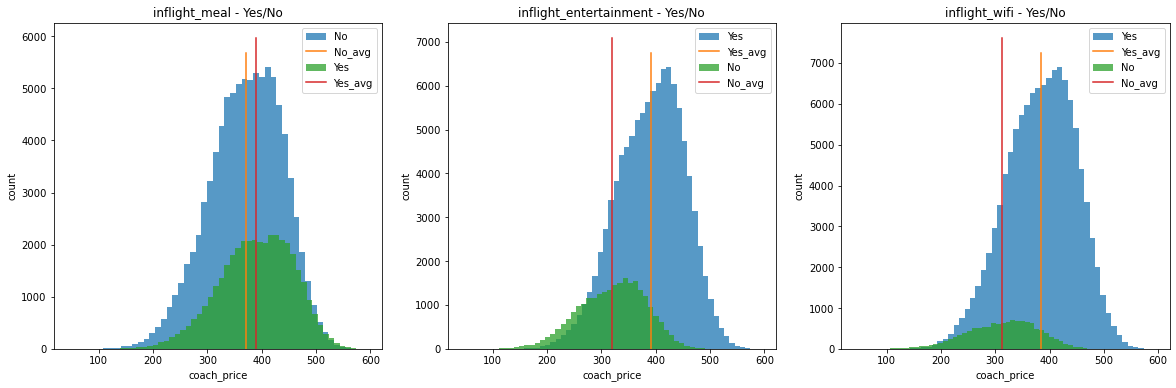

In [8]:
plt.figure(figsize=(20,6))
for i in range(len(category)):
    ax = plt.subplot(1,len(category),i+1)
    labs = flight[category[i]].unique()
    for l in labs:
        plt.hist(flight['coach_price'][flight[category[i]]==l], alpha=0.75, label=l, bins=50)
        avg = np.mean(flight['coach_price'][flight[category[i]]==l])
        plt.plot([avg,avg],ax.get_ylim(), label = l+'_avg')
        plt.legend()
        plt.title(category[i]+' - Yes/No')
        plt.xlabel('coach_price')
        plt.ylabel('count')
plt.show()

Yes: 411.0752722658076
No: 252.1720958904107


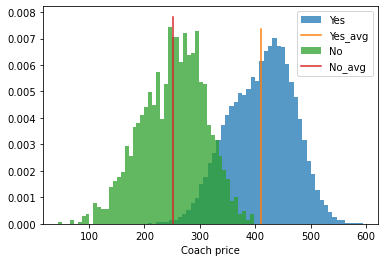

In [9]:
ax = plt.subplot()
for comb in [3*['Yes'], 3*['No']]:
    data = flight['coach_price'][(flight[category[0]]==comb[0])&(flight[category[1]]==comb[1])&(flight[category[2]]==comb[2])]
    plt.hist(data, alpha=0.75, label=comb[0], bins=50, density=True)
    avg = np.mean(data)
    print(comb[0]+': '+str(avg))
    plt.plot([avg,avg],ax.get_ylim(), label=comb[0]+'_avg')
plt.legend()
plt.xlabel('Coach price')
plt.show()

*Most of the flight tickets (about 50%) included the inflight entertainment and inflight wifi. Then, about 21% of the tickets included all the inflight features — inflight meal, inflight entertainment, and inflight WiFi. In addition, no matter what feature was included, the ticket price was likely to be higher with that feature than without it.*

*Average price for ticket which included all features was around 411USD, when tickets without any features cost averagely 252USD.* 

6. How does the number of passengers change in relation to the length of flights?

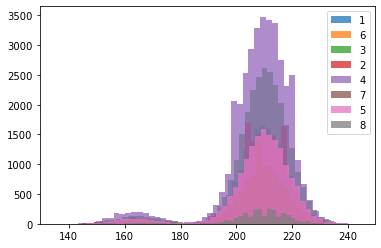

<Figure size 432x288 with 0 Axes>

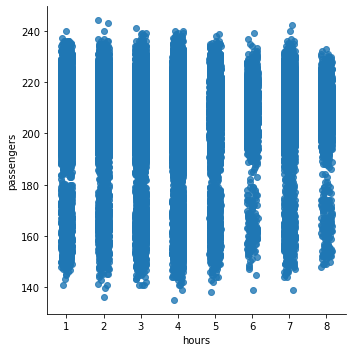

In [10]:
## Task 6
for hours in flight['hours'].unique():
    data = flight['passengers'][flight['hours']==hours]
    plt.hist(data, alpha=0.75, label=hours, bins=50)
plt.legend()
plt.show()
plt.clf()

sns.lmplot(data=flight, x='hours', y='passengers', x_jitter = .15, y_jitter = .15, fit_reg = False)
plt.show()

*There is no significant relation between the number of passengers and the length of flights.* 

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

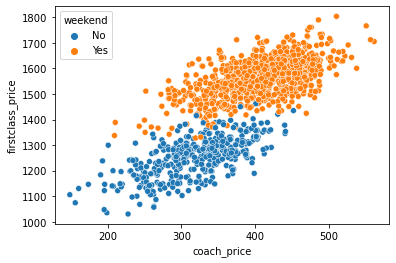

In [11]:
## Task 7
sns.scatterplot(data=flight_sub, x='coach_price', y='firstclass_price', hue='weekend')
plt.show()

*There is significant relationship between coach and first-class prices. In addition, all ticket prices are higher on on weekends compared to weekdays.* 

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

In [12]:
## Task 8

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
nums = [i for i in range(1,8)]
map_ordered = {key:val for key,val in zip(order, nums)}
print(map_ordered)

{'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}


In [13]:
flight['day_of_week_num'] = flight['day_of_week'].map(map_ordered)
display(flight.head())
flight_sub = flight.sample(n = int(flight.shape[0]*0.05))

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours,day_of_week_num
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1,7
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6,7
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3,5
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2,6
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2,1


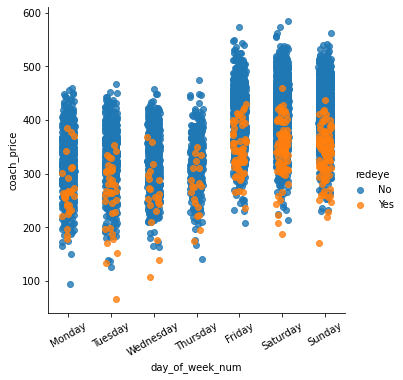

In [14]:
sns.lmplot(data=flight_sub, x='day_of_week_num', y='coach_price', hue='redeye', x_jitter = .15, y_jitter = .15, fit_reg = False)
plt.xticks(nums,order,rotation=30)
plt.show()

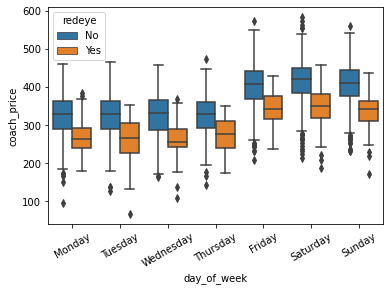

In [15]:
sns.boxplot(data=flight_sub, x="day_of_week", y="coach_price", hue="redeye", order=order)
plt.xticks(rotation=30)
plt.show()

*Coach prices were significantly higher on weekends compared to weekdays. However, no matter what day it was, the redeye tickets were cheaper than flights during the day.* 